In [ ]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Define dataset directories
base_dir = "/content/drive/MyDrive/animals"
cat_dir = os.path.join(base_dir, "cat")
dog_dir = os.path.join(base_dir, "dog")



In [ ]:
# Function to load images and labels
def load_images_and_labels(cat_dir, dog_dir, image_size=(64, 64)):
    images = []
    labels = []

    # Load cat images
    for image_name in os.listdir(cat_dir):
        if image_name.startswith("."):  # Skip hidden files
            continue
        img_path = os.path.join(cat_dir, image_name)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, image_size)
            images.append(img)
            labels.append(0)  # Label 0 for cats
        else:
            print(f"Could not load image: {img_path}")

    # Load dog images
    for image_name in os.listdir(dog_dir):
        if image_name.startswith("."):  # Skip hidden files
            continue
        img_path = os.path.join(dog_dir, image_name)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, image_size)
            images.append(img)
            labels.append(1)  # Label 1 for dogs
        else:
            print(f"Could not load image: {img_path}")

    return np.array(images), np.array(labels)



In [ ]:
# Load data
images, labels = load_images_and_labels(cat_dir, dog_dir)

# Flatten images into 1D arrays
images_flattened = images.reshape(images.shape[0], -1)  # Convert images to feature vectors

# Normalize pixel values to [0, 1] range
images_flattened = images_flattened / 255.0

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(images_flattened, labels, test_size=0.2, random_state=42)

In [ ]:

# --- Model Training ---
# Train the SVM classifier with a linear kernel
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)


SVC(kernel='linear')

In [ ]:
# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Accuracy: 73.50%

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.79      0.74        96
           1       0.78      0.68      0.73       104

    accuracy                           0.73       200
   macro avg       0.74      0.74      0.73       200
weighted avg       0.74      0.73      0.73       200



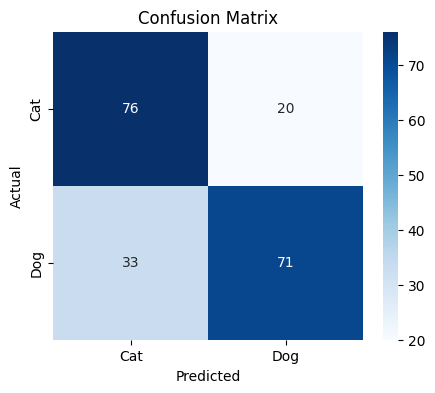

In [ ]:
# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=["Cat", "Dog"], yticklabels=["Cat", "Dog"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()



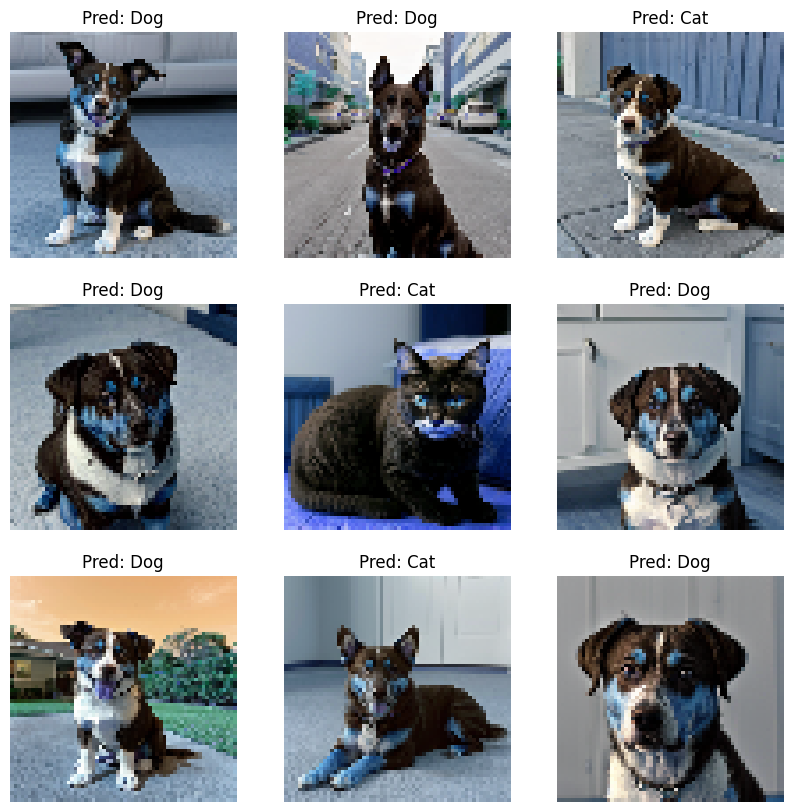

In [ ]:
# Visualizing Some Predictions
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = X_test[i].reshape(64, 64, 3)  # Reshape back to image format
    plt.imshow(img)
    plt.title(f"Pred: {'Dog' if y_pred[i] == 1 else 'Cat'}")
    plt.axis("off")
plt.show()